#                                    Medical Cost Personal Insurance Project.

### To Predict  insurance costs!

### Dataset Link:-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\chaud\Downloads\medical_cost_insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

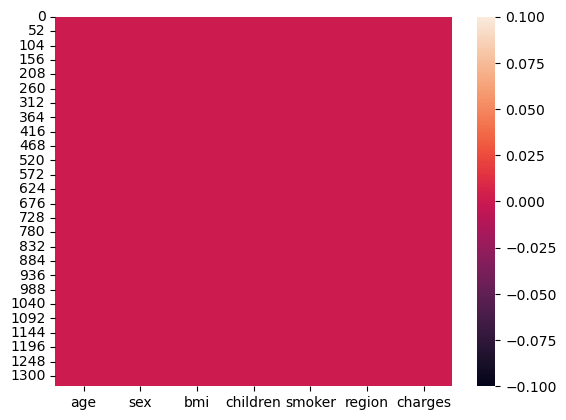

In [6]:
sns.heatmap(df.isnull())

In [7]:
print("Rows, columns: " + str(df.shape))
df.columns

Rows, columns: (1338, 7)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Statistical Summery 

In [8]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [9]:
BMI=df['bmi']>=30.0
BMI.value_counts()

True     707
False    631
Name: bmi, dtype: int64


 BMI below 18.5 is underweight

 BMI of 18.5 to 24.9 is healthy weight
 
 BMI of 25 to 29.9 is overweight
 
 BMI of 30 and above is obese
 
 Here average BMI of people is 30. It means 707 people are obese.

In [10]:
df['sex']=df['sex'].map({'female':0,'male':1})

In [11]:
df['smoker']=df['smoker'].map({'yes':1,'no':0})

In [12]:
df['region']=df['region'].map({'southeast':2,'southwest':1,'northeast':4,'northwest':3})

In [13]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


### **Train/test split**

*  Split data into two part : a training set and a testing set 
*  Train the model on training set
*  Test the model on testing set

In [14]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
X= df.drop(['charges'],axis=1)
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [16]:
Y=df['charges']
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
Y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Model Training

In [19]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
svm = SVR()
svm.fit(X_train,Y_train)
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,Y_train)

GradientBoostingRegressor()

### Predicting on Test Data

In [20]:
Y_pred1 = lr.predict(X_test)
Y_pred2 = svm.predict(X_test)
Y_pred3 = rf.predict(X_test)
Y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':Y_test,'Lr':Y_pred1,
                  'svm':Y_pred2,'rf':Y_pred3,'gr':Y_pred4})
df1

,Actual,Lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,12426.440663,11001.128629
887,5272.17580,7116.295018,9492.515425,5398.731979,5840.174656
890,29330.98315,36909.013521,9648.758701,28265.077732,28001.980112
1293,9301.89355,9507.874691,9555.044136,10115.779152,9745.291602
259,33750.29180,27013.350008,9420.421978,34509.585550,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47048.562911,45431.423211
575,12222.89830,11814.555568,9625.431547,12646.620276,12465.025294
535,6067.12675,7638.107736,9504.168517,6347.818826,6974.336525
543,63770.42801,40959.081722,9605.004594,46177.413460,47862.047791


Compare  visual performance 

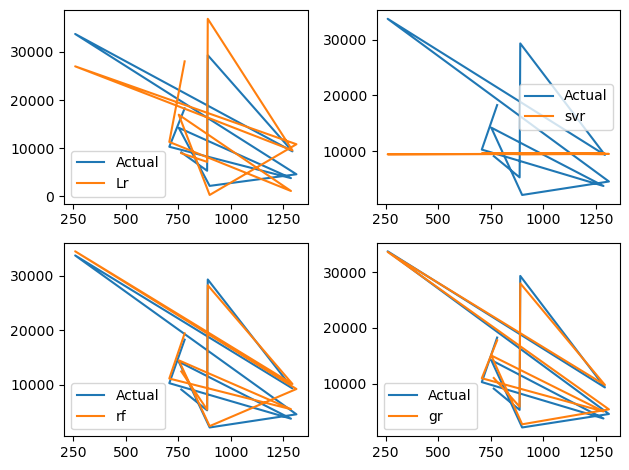

In [22]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label='Lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label='svr')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label='rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label='gr')
plt.legend()

plt.tight_layout()

### Evaluating Algorithm

In [23]:
from sklearn import metrics

score1 = metrics.r2_score(Y_test,Y_pred1)
score2 = metrics.r2_score(Y_test,Y_pred2)
score3 = metrics.r2_score(Y_test,Y_pred3)
score4 = metrics.r2_score(Y_test,Y_pred4)

In [24]:
print(score1,score2,score3,score4)

0.7833463107364539 -0.07229762787861826 0.8650424340408884 0.8779936181637191


In [25]:
score_1 = metrics.mean_absolute_error(Y_test,Y_pred1)
score_2 = metrics.mean_absolute_error(Y_test,Y_pred2)
score_3 = metrics.mean_absolute_error(Y_test,Y_pred3)
score_4 = metrics.mean_absolute_error(Y_test,Y_pred4)

In [26]:
print(score_1,score_2,score_3,score_4)

4186.508898366433 8592.428727899724 2484.394456017662 2447.167158715136


### predicting new customer 

In [27]:
data = {'age':43,'sex':1,'bmi':40.30,'children':2,'smoker':0,'region':2}
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,43,1,40.3,2,0,2


In [28]:
new_pred = gr.predict(df)
print(new_pred)

[9466.35390855]
